# Project Title - case study on Stack Overflow Annual Developer Survey

I am performing a case study on the Stack Overflow Annual Developer Survey. With over 70,000 responses fielded from over 180 countries, the Stack Overflow Annual Developer Survey examines all aspects of the developer experience from learning to code to their favorite technologies to version control and the workplace experience of professional developers.

I am performing EDA and will be analysing certain trends and answering some questions.

## Downloading the Dataset

In this project we are downloading dataset by using a helper library opendataset, which contains a collection of curated datasets and provides a helper function for direct download. This is created by Jovian.ai and they have uploaded in the github. We can simply download the dataset by using the Dataset Id created by them. 

link to Jovian open dataset - https://github.com/JovianML/opendatasets#opendatasets

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
import opendatasets as od

In [3]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:01, 60583346.77it/s]                              


16384it [00:00, 80365.29it/s]           


8192it [00:00, 31694.72it/s]            


The dataset has been downloaded and extracted.

In [4]:
# lets just confirm if the data is downloaded to the directory. For that we import os and check with os.listdir(filename)
data_dir = 'stackoverflow-developer-survey-2020'

In [5]:
import os
os.listdir(data_dir)

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

Let us save and upload our work to Jovian before continuing.

In [116]:
project_name = "zerotopandas-case study on stack overflow annual developer survey"

In [111]:
!pip install jovian --upgrade -q

In [112]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

## Data Preparation and Cleaning


First we will load the dataset into data frame using Pandas.

In [6]:
# import pandas
import pandas as pd

In [7]:
#read the csv file into the data frame
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [9]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [10]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [8]:
survey_schema = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'

In [9]:
survey_schema_df = pd.read_csv(survey_schema)

In [54]:
survey_schema_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [13]:
#Accessing the QuestionText based on the column
survey_schema_df[survey_schema_df['Column'] == 'YearsCodePro']

,Column,QuestionText
60,YearsCodePro,"NOT including education, how many years have y..."


In [14]:
import jovian

In [15]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yash0506-ks/zerotopandas-case-study-on-stack-overflow-annual-developer-survey" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/yash0506-ks/zerotopandas-case-study-on-stack-overflow-annual-developer-survey


'https://jovian.com/yash0506-ks/zerotopandas-case-study-on-stack-overflow-annual-developer-survey'

This dataset contains many information, which we dont require for our analysis. So lets select the columns that we only need for our analysis. We will create a subset selected_columns and copy the columns from the main dataset.

In [10]:
selected_columns = [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #Programming Experience
    'Age1stCode',
    'Hobbyist',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'WebframeWorkedWith',
    'NEWLearn',
    'NEWStuck',
    #Employement
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobFactors',
    'JobSat',
    'NEWOvertime',
    'NEWEdImpt'
]

In [12]:
len(selected_columns)

21

In [11]:
survey_df = survey_raw_df[selected_columns].copy()

In [12]:
schema_raw = pd.read_csv(survey_schema, index_col='Column').QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [13]:
schema = schema_raw[selected_columns]
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Age1stCode                At what age did you write your first line of c...
Hobbyist                                            Do you code as a hobby?
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
WebframeWorkedWith        Which web frameworks have you done extensive d...
NEWLearn                  How frequently do you learn a new language or ...
NEWSt

In [19]:
survey_df.shape

(64461, 21)

In [20]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Age1stCode              57900 non-null  object 
 6   Hobbyist                64416 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  WebframeWorkedWith      42279 non-null  object 
 12  NEWLearn                56156 non-null  object 
 13  NEWStuck                54983 non-null  object 
 14  Employment              63854 non-null

In [14]:
survey_df['Age1stCode']= pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [22]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [15]:
#As we can see min age 1years and max age 279 which is invalid for a person to start coding at that age. 
#Lets drop those rows where min age is less than 10 years and max age more than 100 years

survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [16]:
#Lets also drop the rows where WorkweekHrs is more than 140 hrs(i,e 20 hrs/day)

survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [17]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [18]:
import numpy as np
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [28]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Age1stCode,Hobbyist,YearsCode,YearsCodePro,LanguageWorkedWith,...,WebframeWorkedWith,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobFactors,JobSat,NEWOvertime,NEWEdImpt
11526,Spain,31.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",16.0,Yes,12.0,6.0,Objective-C;Swift,...,NaN,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, mobile",42.0,Flex time or a flexible schedule;Remote work o...,Slightly satisfied,Sometimes: 1-2 days per month but less than we...,Very important
27253,Austria,27.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",14.0,Yes,7.0,2.0,Assembly;C;C++;Go;Python,...,NaN,Every few months,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, desktop or enterprise applications;...",42.0,"Languages, frameworks, and other technologies ...",Slightly satisfied,Often: 1-2 days per week or more,Very important
51663,India,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",11.0,Yes,10.0,1.0,Bash/Shell/PowerShell;C;C#;C++;Dart;Go;HTML/CS...,...,Django;Express;Flask;React.js;Spring,Every few months,Meditate;Play games;Visit Stack Overflow;Go fo...,Employed full-time,"Academic researcher;Developer, full-stack;DevO...",45.0,Diversity of the company or organization;Langu...,Very satisfied,Often: 1-2 days per week or more,Fairly important
13444,South Africa,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",24.0,Yes,5.0,5.0,HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,...,Express;Flask;React.js;Vue.js,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,"Flex time or a flexible schedule;Languages, fr...",Neither satisfied nor dissatisfied,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
45205,Netherlands,20.0,Man,"Secondary school (e.g. American high school, G...",NaN,18.0,No,3.0,NaN,C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL,...,Laravel,Once a year,Visit Stack Overflow;Panic;Watch help / tutori...,Student,NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN,NaN
15988,Albania,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,16.0,No,2.0,NaN,HTML/CSS;Java;Python;SQL,...,Django,Every few months,Visit Stack Overflow,Student,NaN,NaN,NaN,NaN,NaN,NaN
28804,Czech Republic,19.0,Man,Primary/elementary school,NaN,16.0,Yes,3.0,NaN,C#;HTML/CSS;JavaScript;PHP;SQL,...,ASP.NET Core;Drupal;Express;jQuery;React.js,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,Flex time or a flexible schedule;Office enviro...,NaN,NaN,NaN
27688,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",16.0,Yes,42.0,35.0,Bash/Shell/PowerShell;C;Python,...,Angular,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",50.0,Flex time or a flexible schedule;Specific depa...,Slightly satisfied,Often: 1-2 days per week or more,Fairly important
45646,Pakistan,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,20.0,Yes,5.0,3.0,C#;HTML/CSS;JavaScript;SQL,...,ASP.NET;jQuery,Every few months,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Remote work options;Office environment or comp...,Slightly satisfied,Often: 1-2 days per week or more,Somewhat important
62399,India,NaN,NaN,Some college/university study without earning ...,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Country

We will look at top 10 countries from where the developers have contributed to the survey

In [20]:
survey_df['Country'].nunique()

183

There are about 183 countries, we will pick top 10 countries

In [21]:
top_countries = survey_df['Country'].value_counts().head(10)
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

We will visualize the top 10 countries using a bar plot

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


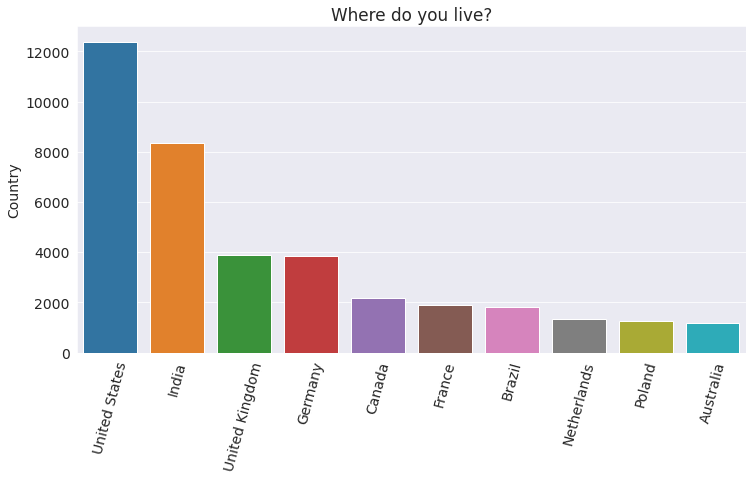

In [50]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(top_countries.index, top_countries);

## Age

We will analyse the different age group in which the coders have contributed

For that we will plot a histogram, set the bins starting from age group 10 to 100 and bins 5

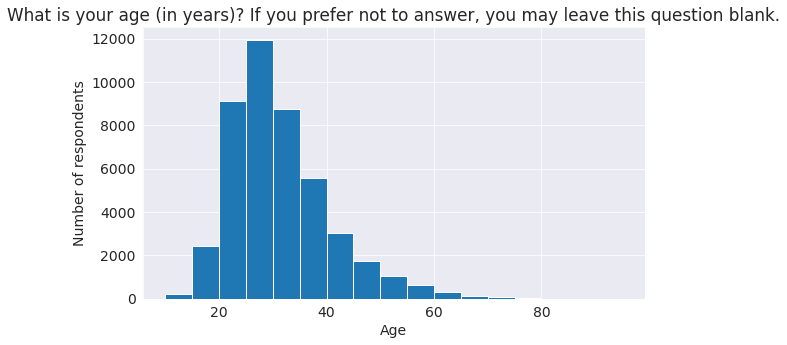

In [52]:
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins = np.arange(10,100,5));

## Gender

Now lets look at the distribution of responses for the gender. We will visualize this in a pie chart

In [22]:
gender_counts = survey_df['Gender'].value_counts()

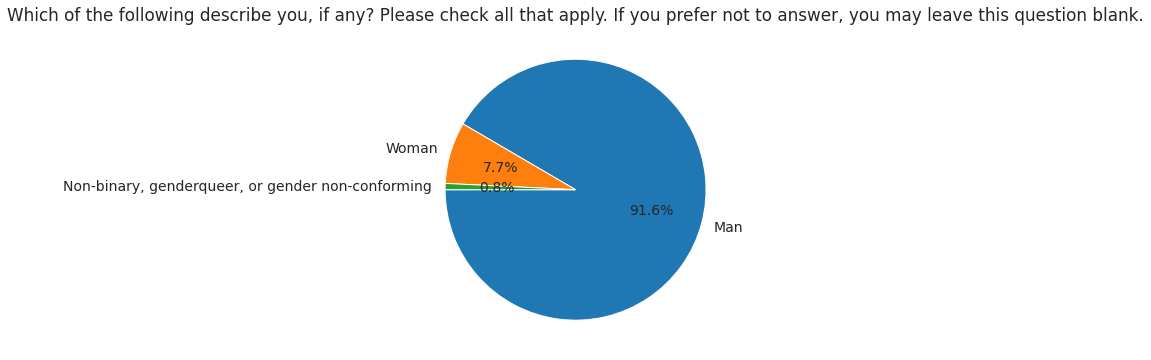

In [61]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct = '%1.1f%%' , startangle=180);

## Education Level

We will now analyse what are the education levels for the respondents

In [62]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

Text(0, 0.5, '')

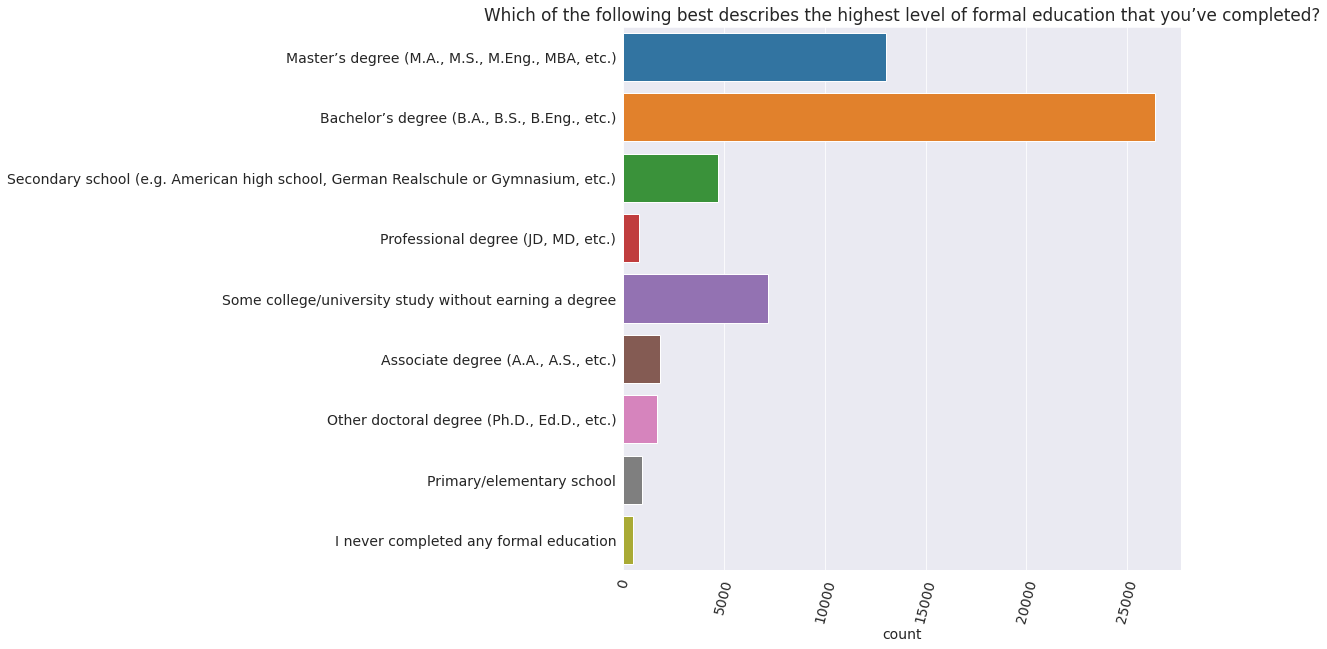

In [76]:
plt.figure(figsize=(10,10))

sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema.EdLevel)
plt.ylabel(None)

Let us save and upload our work to Jovian before continuing

## Undergraduate Percentage

In [77]:
schema.UndergradMajor

'What was your primary field of study?'

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

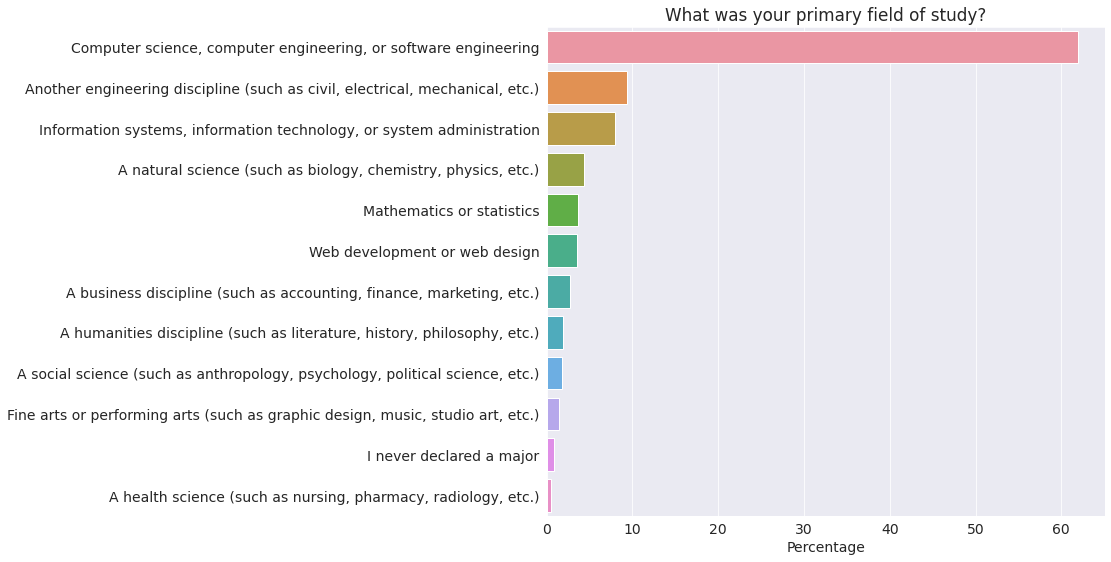

In [23]:
#We will calculate the percentage to see what percent of respondents's undergraduate level of study was computers

undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

plt.figure(figsize=(10,9))
sns.barplot(undergrad_pct, undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.xlabel('Percentage')
plt.ylabel(None)

## Employment

In [82]:
schema.Employment

'Which of the following best describes your current employment status?'

In [83]:
survey_df['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

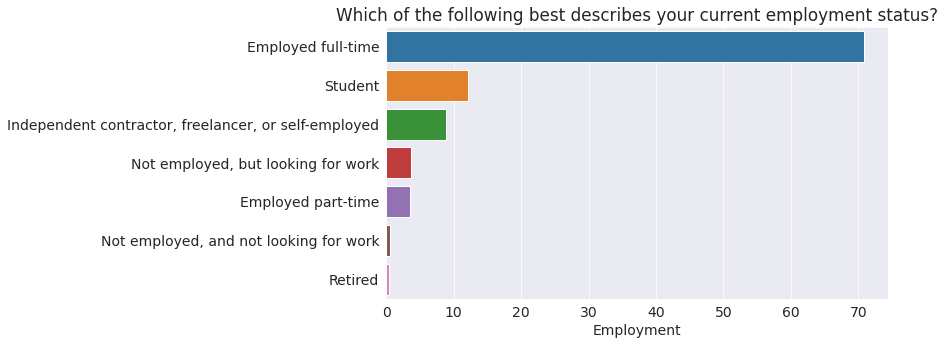

In [24]:
#We will analyse the percentage of respondents having different types of employements
employment_pct = survey_df.Employment.value_counts() * 100 / survey_df.Employment.count()

sns.barplot(employment_pct, employment_pct.index)
plt.title(schema.Employment)
plt.ylabel(None)

## just for information

We can also use pandas bar plot function as shown below

(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)

plt.xlabel('Percentage');


Here normalize=True, gives fraction and * 100 converts it into percentage. then we use .plot and set the kind arguement to 'barh'

In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

# Asking and Answering Questions


### Helper function to break one column into entire DataFrame

Let us create a helper function split_multicolumn, which turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option. We can use this for our future analysis, if we require to analyse a column where the respondents have choosen multiple options or checkboxes

In [20]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [23]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [24]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.

In [42]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q1: What are the most popular programming languages in 2020?

To answer this we will use the column 'LanguageWorkedWith' This column is also similar to 'DevType' column, which has multiple options, i,e the respondents have seleted multiple Languages worked with. So we will use the helper function split_multicolumn 
'LanguageWorkedWith' to extract all the options seperately.

In [25]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [26]:
#First, we'll split this column into a data frame containing a column of each language listed in the options.

languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
languages_worked_percentage = languages_worked_df.sum()

#languages_worked_df.mean() gives average, multiply by 100 gives percentage
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

We can show this in a horizontal bar chart

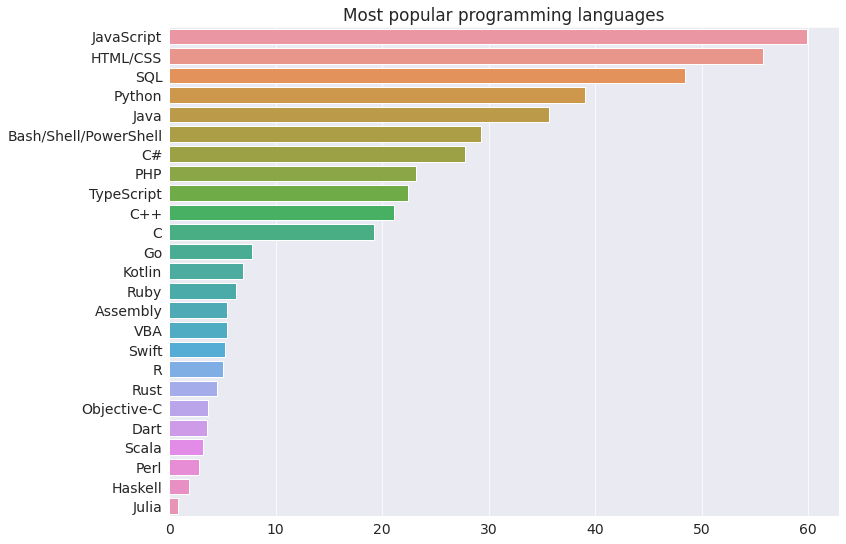

In [32]:
plt.figure(figsize=(12,9));
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index);
plt.title('Most popular programming languages');

#### Q2: Which languages are the most people interested to learn over the next year?

In [33]:
survey_df.LanguageDesireNextYear

0                                   C#;HTML/CSS;JavaScript
1                                             Python;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                          Java;Ruby;Scala
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 64306, dtype: object

In [35]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
languages_interested_sum = languages_interested_df.sum().sort_values(ascending=False)
languages_interested_sum

Python                   26458
JavaScript               25996
HTML/CSS                 20596
SQL                      19806
TypeScript               17010
C#                       13542
Java                     13160
Go                       12496
Bash/Shell/PowerShell    11612
Rust                     10463
C++                       9655
Kotlin                    9492
PHP                       7040
C                         6019
Swift                     5590
Dart                      4700
R                         4226
Ruby                      4132
Scala                     3425
Haskell                   2954
Assembly                  2422
Julia                     1634
Objective-C               1504
Perl                      1133
VBA                       1036
dtype: int64

In [46]:
languages_interested_percentages = languages_interested_df.mean() * 100
languages_interested_percentages = languages_interested_percentages.sort_values(ascending=False)
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

We will show this using bar chart

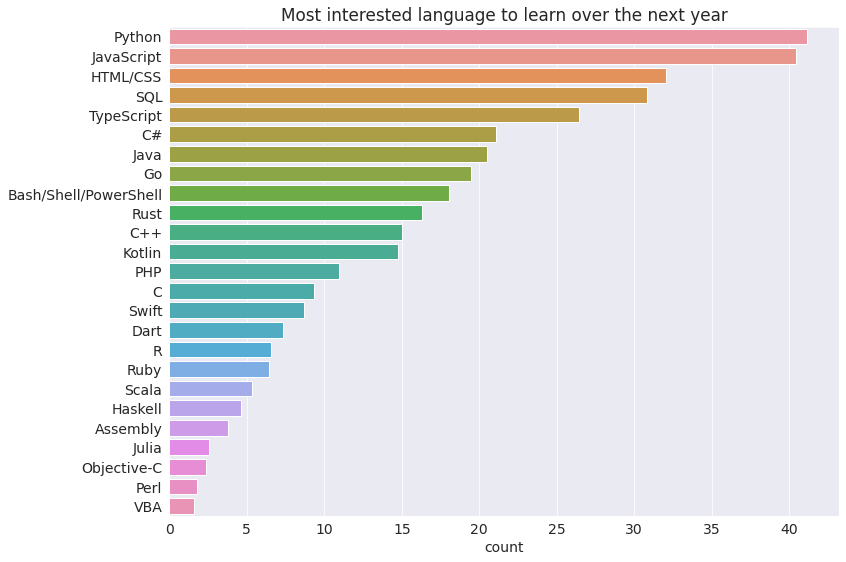

In [49]:
plt.figure(figsize=(12,9))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index);
plt.title('Most interested language to learn over the next year');
plt.xlabel('count');

#### Q3: TODO - Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

We can do it in the following ways:

- Create a new data frame languages_loved_df that contains a True value for a language only if the corresponding values in languages_worked_df and languages_interested_df are both True
- Take the column-wise sum of languages_loved_df and divide it by the column-wise sum of languages_worked_df to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [56]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_df 

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
languages_loved_df_sum = languages_loved_df.sum()
languages_loved_df_sum

Assembly                  1019
Bash/Shell/PowerShell    10095
C                         4080
C#                       10660
C++                       5895
Dart                      1404
Go                        3102
HTML/CSS                 19196
Haskell                    615
Java                     10103
JavaScript               22475
Julia                      309
Kotlin                    2782
Objective-C                536
PHP                       5538
Perl                       503
Python                   16703
R                         1447
Ruby                      1712
Rust                      2490
SQL                      17635
Scala                     1079
Swift                     1999
TypeScript                9694
VBA                        675
dtype: int64

In [64]:
languages_worked_df_sum = languages_worked_df.sum()
languages_worked_df_sum

C#                       17879
HTML/CSS                 35884
JavaScript               38515
Swift                     3361
Objective-C               2317
Python                   25080
Ruby                      4006
SQL                      31153
Java                     22905
PHP                      14874
C                        12370
TypeScript               14444
Bash/Shell/PowerShell    18803
Kotlin                    4429
R                         3257
VBA                       3469
Perl                      1773
Scala                     2026
C++                      13578
Go                        4989
Haskell                   1197
Rust                      2893
Dart                      2262
Julia                      503
Assembly                  3503
dtype: int64

In [68]:
languages_loved_percentage = languages_loved_df_sum * 100 / languages_worked_df_sum
languages_loved_percentage = languages_loved_percentage.sort_values(ascending=False)

In [69]:
languages_loved_percentage

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

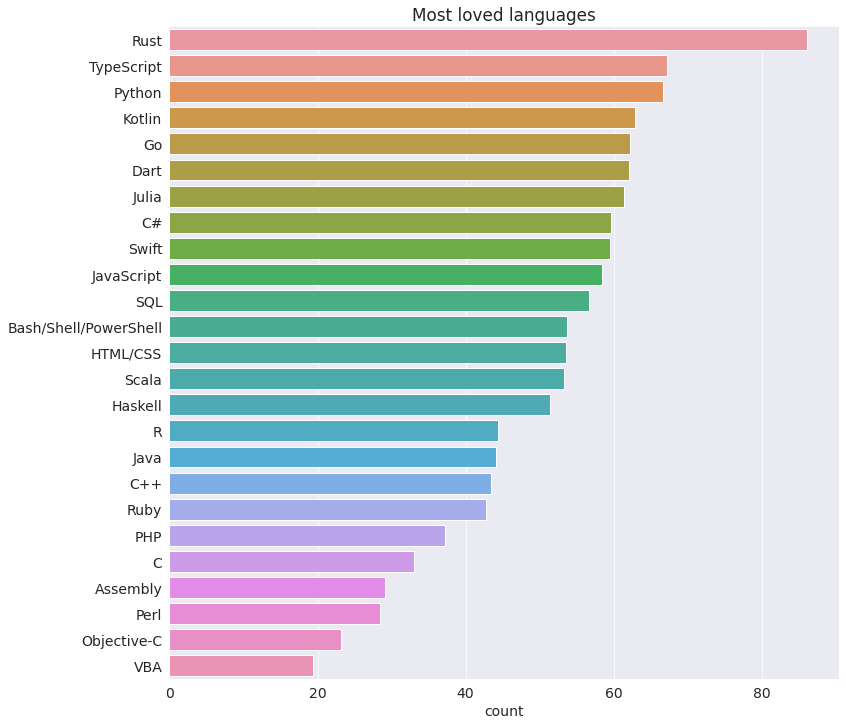

In [71]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentage, y=languages_loved_percentage.index)
plt.title("Most loved languages");
plt.xlabel('count');

#### Q4: TODO - What are the most dreaded languages, i.e., languages which people have used in the past year but do not want to learn/use over the next year

In [73]:
languages_dreaded_df = languages_worked_df & (~languages_interested_df)
languages_dreaded_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
languages_dreaded_percentage = (languages_dreaded_df.sum() * 100 / languages_worked_df.sum()).sort_values(ascending=False)
languages_dreaded_percentage

VBA                      80.541943
Objective-C              76.866638
Perl                     71.630006
Assembly                 70.910648
C                        67.016977
PHP                      62.767245
Ruby                     57.264104
C++                      56.584180
Java                     55.891727
R                        55.572613
Haskell                  48.621554
Scala                    46.742349
HTML/CSS                 46.505406
Bash/Shell/PowerShell    46.311759
SQL                      43.392290
JavaScript               41.646112
Swift                    40.523654
C#                       40.376979
Julia                    38.568588
Dart                     37.931034
Go                       37.823211
Kotlin                   37.186724
Python                   33.401116
TypeScript               32.885627
Rust                     13.930176
dtype: float64

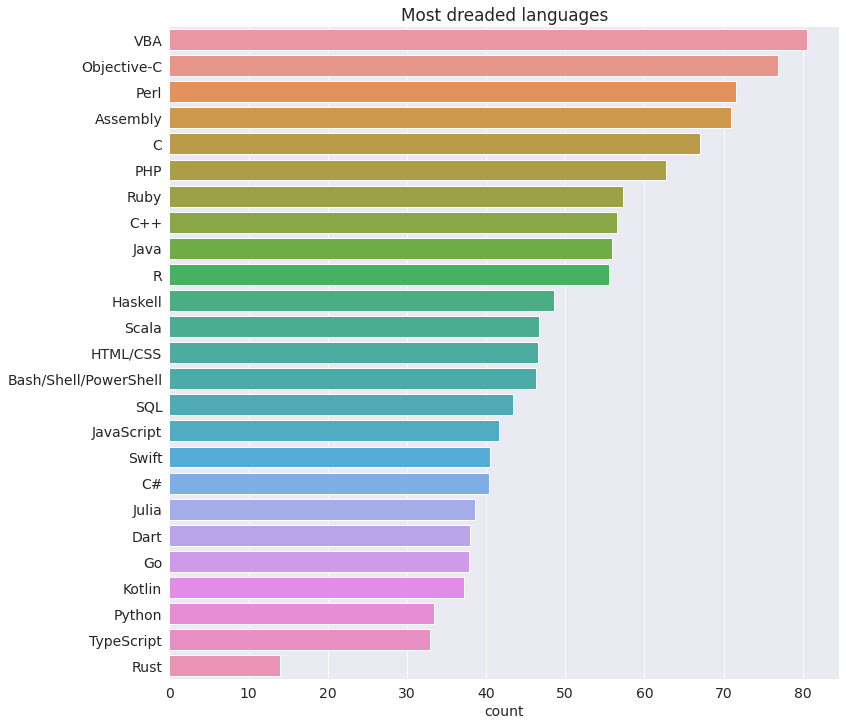

In [77]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_dreaded_percentage, y=languages_dreaded_percentage.index)
plt.title("Most dreaded languages");
plt.xlabel('count');

#### Q5: -  In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the groupby data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [87]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values(by='WorkWeekHrs', ascending=False)
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [96]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


Let us save and upload our work to Jovian before continuing.

#### Q6: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [101]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

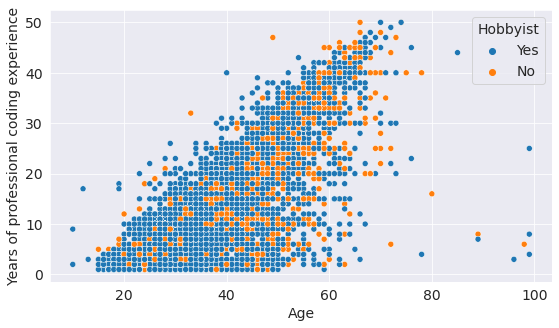

In [104]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df);
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

We can also view the distribution of the Age1stCode column to see when the respondents tried programming for the first time.

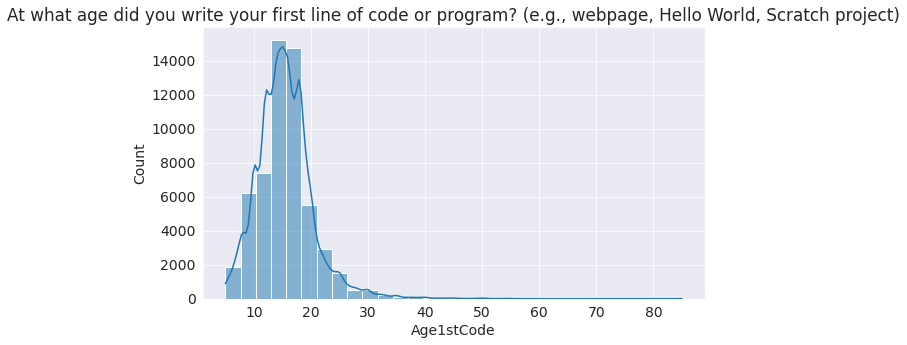

In [107]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

In [108]:
import jovian

In [109]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yash0506-ks/zerotopandas-case-study-on-stack-overflow-annual-developer-survey" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/yash0506-ks/zerotopandas-case-study-on-stack-overflow-annual-developer-survey


'https://jovian.com/yash0506-ks/zerotopandas-case-study-on-stack-overflow-annual-developer-survey'

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

There's a wealth of information that can be discovered using the survey, Here are some ideas for further exploration:


- Repeat the analysis for different age groups & genders, and compare the results
- What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?
- What are the most common languages used by developers older than 35 years of age?
- What are the most common languages used by developers in your home country?
- How do the average work hours compare across continents? You may find this list of countries in each continent useful
- Which role has the highest average number of hours worked per week? Which one has the lowest?
- How do the hours worked compare between freelancers and developers working full-time?
- How does programming experience change opinions & preferences? Repeat the entire analysis while comparing the responses of people who have more than ten years of professional programming experience vs. those who don't. Do you see any interesting trends?
- Compare the years of professional coding experience across different genders.

In [114]:
import jovian

In [115]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yash0506-ks/zerotopandas-case-study-on-stack-overflow-annual-developer-survey" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/yash0506-ks/zerotopandas-case-study-on-stack-overflow-annual-developer-survey


'https://jovian.com/yash0506-ks/zerotopandas-case-study-on-stack-overflow-annual-developer-survey'